In [1]:
pip install numpy pandas matplotlib seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [5]:
dtypes = df.dtypes
dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [6]:
n_unique = df.nunique()
n_unique

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [7]:
pd.DataFrame({ 'DataType': dtypes, 'NumUnique': n_unique}).T


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
DataType,int64,int64,object,float64,int64,int64,float64,object,object
NumUnique,2,3,2,88,7,7,248,147,3


In [8]:
def chek_type(data):
    dtypes = df.dtypes
    n_unique = df.nunique()
    return pd.DataFrame({ 'DataType': dtypes, 'NumUnique': n_unique}).T
chek_type(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
DataType,int64,int64,object,float64,int64,int64,float64,object,object
NumUnique,2,3,2,88,7,7,248,147,3


In [9]:
cols = ['Pclass',
        'Sex',
        'SibSp',
        'Parch',
        'Survived',
        'Embarked']
df[cols] = df[cols].astype('category')
chek_type(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
DataType,category,category,category,float64,category,category,float64,object,category
NumUnique,2,3,2,88,7,7,248,147,3


In [10]:
null = df.isnull().sum()
null

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
df.shape[0]

891

In [12]:
ratio = (null / df.shape[0]) * 100
pd.DataFrame({"Null": null, "Ratio (%)": ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,687.000000,2.000000
Ratio (%),0.0,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467


In [13]:
def check_null(data):
    null = data.isnull().sum()
    ratio = (null / data.shape[0]) * 100
    return pd.DataFrame({"Null": null, "Ratio (%)": ratio}).T
check_null(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,687.000000,2.000000
Ratio (%),0.0,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467


In [14]:
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)


In [15]:
df.dropna(subset=['Embarked'],inplace=True)


In [16]:
df = df.drop('Cabin', axis=1)

In [17]:
def check_null(data):
    null = data.isnull().sum()
    ratio = (null / data.shape[0]) * 100
    return pd.DataFrame({"Null": null, "Ratio (%)": ratio}).T
check_null(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ratio (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


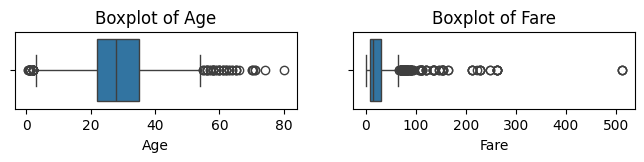

In [18]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(8, 1))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    sns.boxplot(df[col],orient='h')
    plt.title(f'Boxplot of {col}')
   

In [19]:
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    lower_outliers = df[df[col] < lower_bound].values
    upper_outliers = df[df[col] > upper_bound].values

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


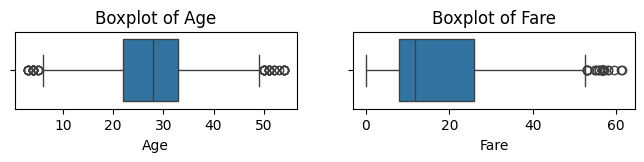

In [20]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(8, 1))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    sns.boxplot(df[col],orient='h')
    plt.title(f'Boxplot of {col}')
   

In [21]:
df.duplicated().sum()

np.int64(108)

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.duplicated().sum()

np.int64(0)

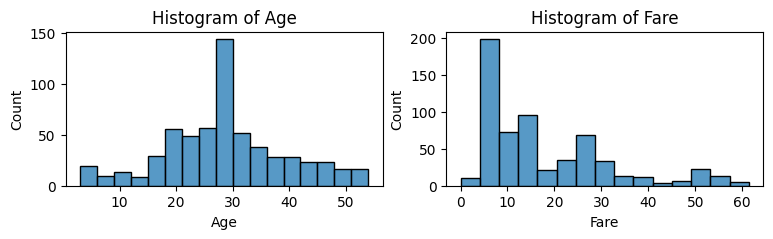

In [24]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(9, 2))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    sns.histplot(df[col])
    plt.title(f'Histogram of {col}')

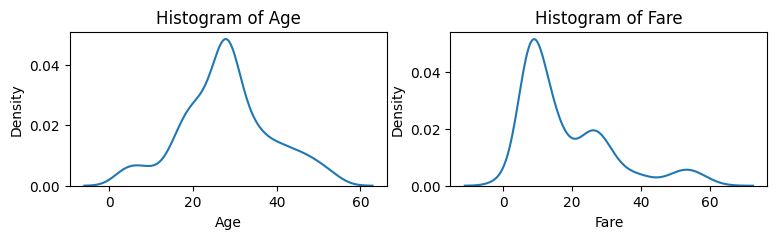

In [25]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(9, 2))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    sns.kdeplot(df[col])
    plt.title(f'Histogram of {col}')

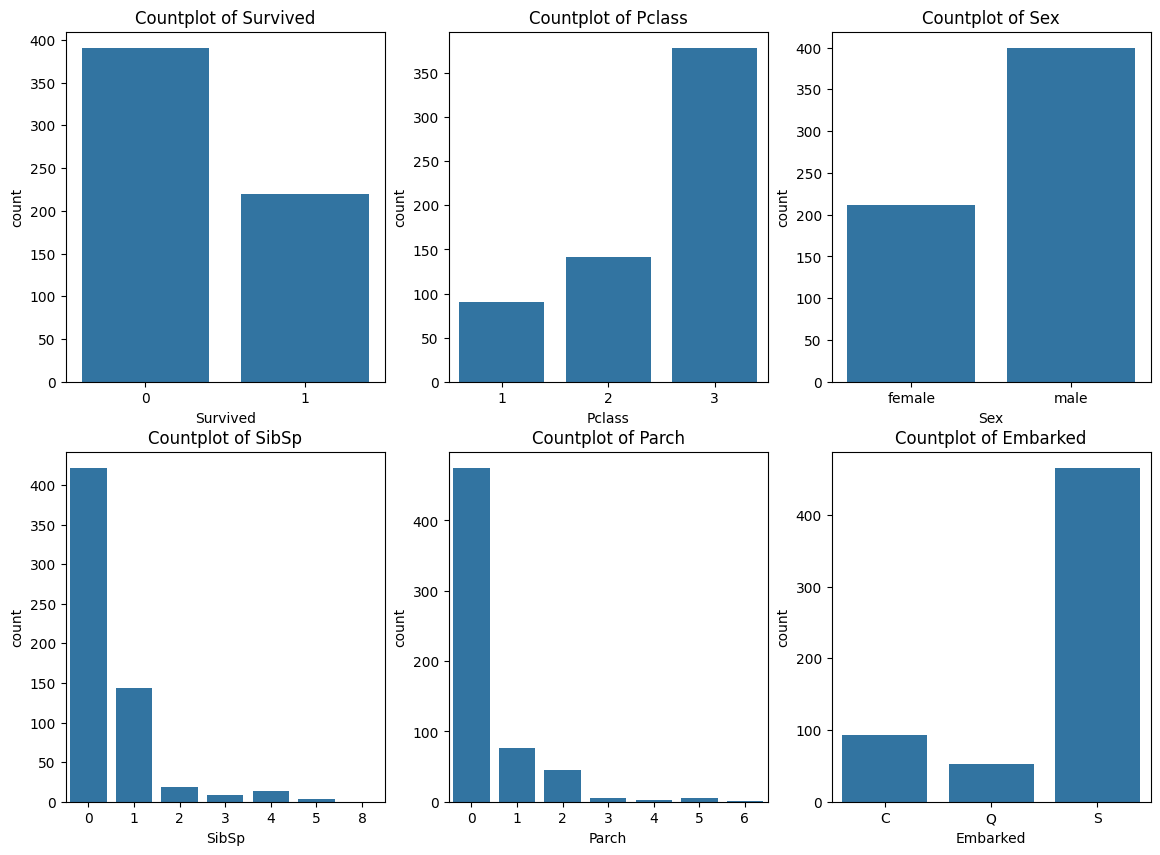

In [ ]:
cat_cols = df.select_dtypes(include=['category']).columns
plt.figure(figsize=(14, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=df[col])
    plt.title(f'Countplot of {col}')

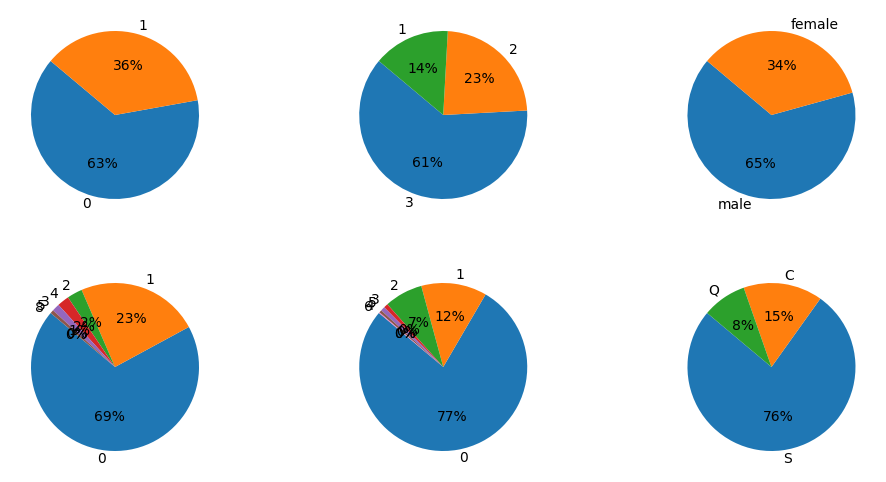

In [27]:
cat_cols = df.select_dtypes(include=['category']).columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i + 1)
    unique_counts = df[col].value_counts()
    count = unique_counts.values
    categories = unique_counts.index
    plt.pie(count, labels=categories, autopct='%1.1d%%', startangle=140)
    

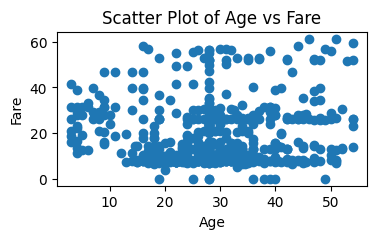

In [28]:
plt.figure(figsize=(4, 2))
plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Age vs Fare')
plt.show()

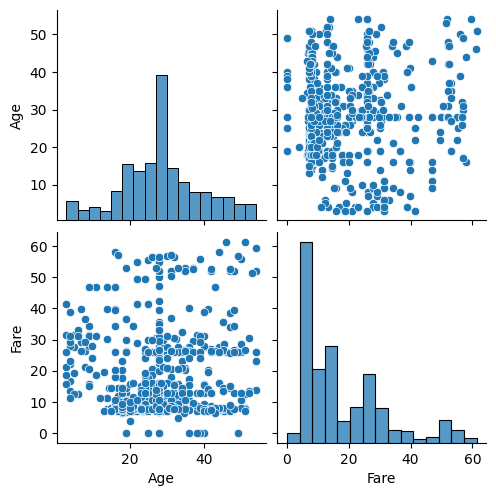

In [29]:
sns.pairplot(df)

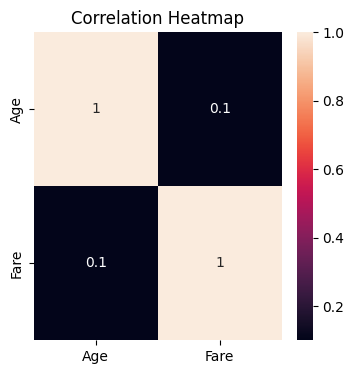

In [30]:
correlation = df[num_cols].corr()
plt.figure(figsize=(4, 4))
sns.heatmap(correlation, annot=True)
plt.title('Correlation Heatmap')
plt.show()

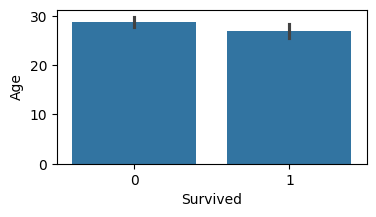

In [31]:
plt.figure(figsize=(4, 2))
sns.barplot(x='Survived', y='Age', data=df)
plt.show()

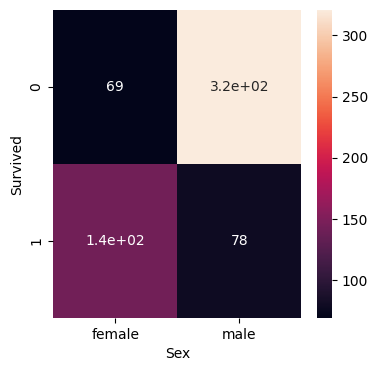

In [32]:
plt.figure(figsize=(4, 4))
agg = df.pivot_table(index='Survived', columns='Sex', values='Age', aggfunc=len)
sns.heatmap(agg, annot=True)
plt.show()

Session_10

In [33]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [34]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
5,3,male,28.0,0,0,8.4583,Q
...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,Q
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [35]:
y

0      0
2      1
3      1
4      0
5      0
      ..
885    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 610, dtype: category
Categories (2, int64): [0, 1]

In [36]:
pip install scikit-learn

In [37]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
num_cols = x.select_dtypes(include=['int64', 'float64']).columns
x[num_cols] = scalar.fit_transform(x[num_cols])
x


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,0.372549,1,0,0.118118,S
2,3,female,0.450980,0,0,0.129115,S
3,1,female,0.627451,1,0,0.865114,S
4,3,male,0.627451,0,0,0.131152,S
5,3,male,0.490196,0,0,0.137804,Q
...,...,...,...,...,...,...,...
885,3,female,0.705882,0,5,0.474509,Q
887,1,female,0.313725,0,0,0.488765,S
888,3,female,0.490196,1,2,0.382051,S
889,1,male,0.450980,0,0,0.488765,C


In [40]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install category-encoders


   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.5 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.5 MB 1.2 MB/s eta 0:00:08
   --- ------------------------------------ 0.8/9.5 MB 1.1 MB/s eta 0:00:08
   ---- ----------------------------------- 1.0/9.5 MB 1.1 MB/s eta 0:00:08
   ----- ---------------------------------- 1.3/9.5 MB 1.1 MB/s eta 0:00:08
   ------ --------------------------------- 1.6/9.5 MB 1.1 MB/s eta 0:00:08
   ------- -------------------------------- 1.8/9.5 MB 1.1 MB/s eta 0:00:07
   -------- ------------------------------- 2.1/9.5 MB 1.1 MB/s eta 0:00:07
   --------- ------------------------------ 2.4/9.5 MB 1.1 MB/s eta 0:00:07
   ---------- ----------------------------- 2.6/9.5 MB 1.1 MB/s eta 0:00:07
   ------------ --------------------------- 2.9/9.5 MB 1.1 MB/s eta 0:00:06
   ------------ -----------------

In [65]:
str_cols = x.select_dtypes(include=['category']).columns

In [66]:
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols = str_cols, drop_invariant=True)
x = encoder.fit_transform(x)


In [67]:
df_2 = pd.read_csv('insurance.csv')
df_2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [68]:
dtypes = df_2.dtypes
dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [71]:
n_unique = df_2.nunique()
pd.DataFrame({"dtype": df_2.dtypes, "n_unique": n_unique}).T

,age,sex,bmi,children,smoker,region,charges
dtype,int64,object,float64,int64,object,object,float64
n_unique,47,2,548,6,2,4,1337


In [75]:
cat_cols = df_2.select_dtypes(include=['object']).columns
df_2[cat_cols] = df_2[cat_cols].astype('category')


In [76]:
pd.DataFrame({"dtype": df_2.dtypes, "n_unique": n_unique}).T

,age,sex,bmi,children,smoker,region,charges
dtype,int64,category,float64,int64,category,category,float64
n_unique,47,2,548,6,2,4,1337


In [77]:
pd.DataFrame(df_2.isnull().sum()).T

,age,sex,bmi,children,smoker,region,charges
0,0,0,0,0,0,0,0


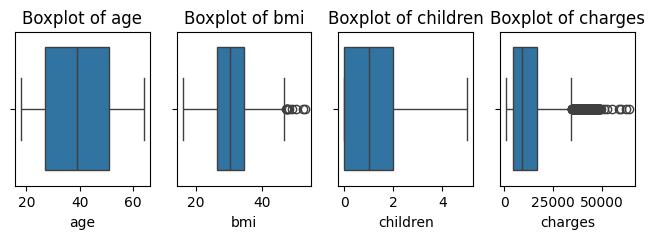

In [ ]:
num_cols = df_2.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(8, 2))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    sns.boxplot(df_2[col],orient='h')
    plt.title(f'Boxplot of {col}')

In [ ]:
q1 = df_2['bmi'].quantile(0.25)
q3 = df_2['bmi'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

lower_outliers = df_2[df_2['bmi'] < lower_bound].values
upper_outliers = df_2[df_2['bmi'] > upper_bound].values

df_2 = df_2[(df_2['bmi'] >= lower_bound) & (df_2['bmi'] <= upper_bound)]



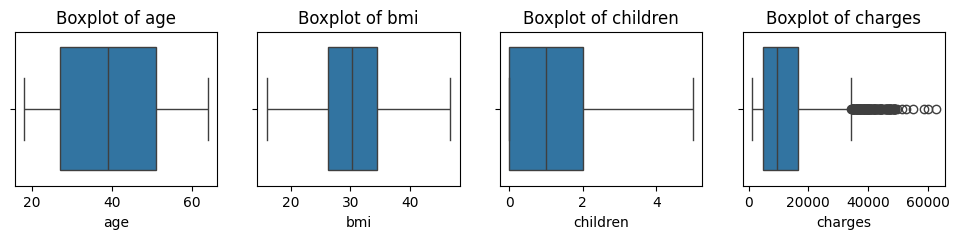

In [85]:
num_cols = df_2.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12,2))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    sns.boxplot(df_2[col],orient='h')
    plt.title(f'Boxplot of {col}')

In [88]:
num_cols = ['age', 'bmi']
cat_cols = ['sex', 'children', 'smoker', 'region']

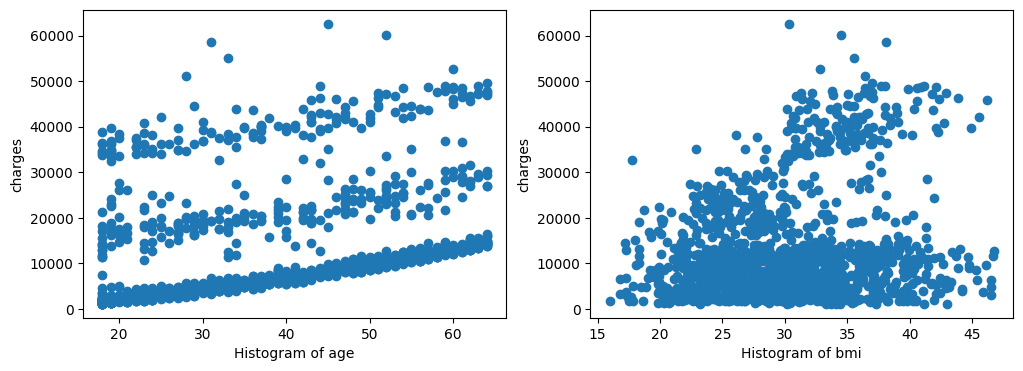

In [93]:
plt.figure(figsize=(12, 4))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    plt.xlabel(f'Histogram of {col}')
    plt.ylabel('charges')
    plt.scatter(df_2[col],df_2['charges'])
plt.show()

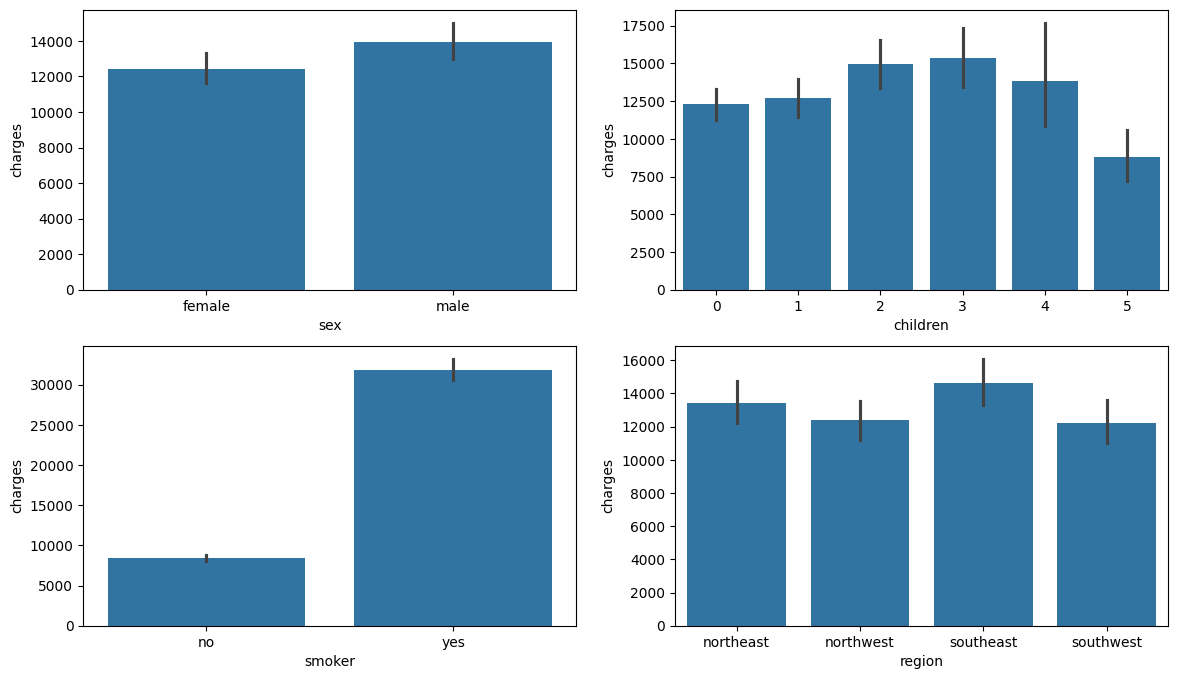

In [111]:
plt.figure(figsize=(14, 8))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i + 1)
    plt.xlabel(f'{col}')
    plt.ylabel('charges')
    sns.barplot(x=df_2[col], y=df_2['charges'])
plt.show()

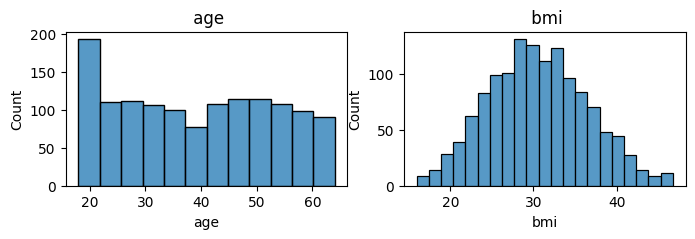

In [114]:
plt.figure(figsize=(8, 2))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    sns.histplot(df_2[col])
    plt.title(f' {col}')
plt.show()

In [ ]:
df_2.duplicated().sum()


np.int64(1)

In [126]:
df_2.drop_duplicates(keep='first', inplace=True)

In [127]:
df_2.duplicated().sum()

np.int64(0)

In [133]:
x = df_2.iloc[:,:-1]
y = df_2.iloc[:,-1:]
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [ ]:
from sklearn.preprocessing import MinMaxScaler
cols_to_norm = x.select_dtypes("number").columns
scaler = MinMaxScaler()
x[cols_to_norm] = scaler.fit_transform(x[cols_to_norm])
 

In [137]:
from category_encoders import OrdinalEncoder
cols_to_encode = ['sex', 'smoker']
ordinal_encoder = OrdinalEncoder(cols=cols_to_encode)
x = ordinal_encoder.fit_transform(x)
 
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols=["region"])
x = encoder.fit_transform(x)
 

In [138]:
x

,age,sex,bmi,children,smoker,region_1,region_2,region_3,region_4
0,0.021739,1,0.387788,0.0,1,1,0,0,0
1,0.000000,2,0.578435,0.2,2,0,1,0,0
2,0.217391,2,0.553426,0.6,2,0,1,0,0
3,0.326087,2,0.219065,0.0,2,0,0,1,0
4,0.304348,2,0.419617,0.0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,0.695652,2,0.487496,0.6,2,0,0,1,0
1334,0.000000,1,0.518350,0.0,2,0,0,0,1
1335,0.000000,1,0.678467,0.0,2,0,1,0,0
1336,0.065217,1,0.319584,0.0,2,1,0,0,0
